# AIML CIA & Miniproject

Topic: Implement the CIA Presentation and Miniproject on RED WINE QUALITY Dataset 

Step 1: Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

Step 2: Loading the dataset

In [2]:
df=pd.read_csv(r"C:\Users\prathamesh\Downloads\wine-quality-white-and-red.csv")

Step 3: Exploring the dataset

In [3]:
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# EDA

1. Statistical EDA

In [4]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
df.head(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [6]:
df.tail(6)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [8]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
df.isnull().mean()*100

type                    0.0
fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

In [10]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [11]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Step 4: Visualizing the data

2. Graphical EDA

<BarContainer object of 6497 artists>

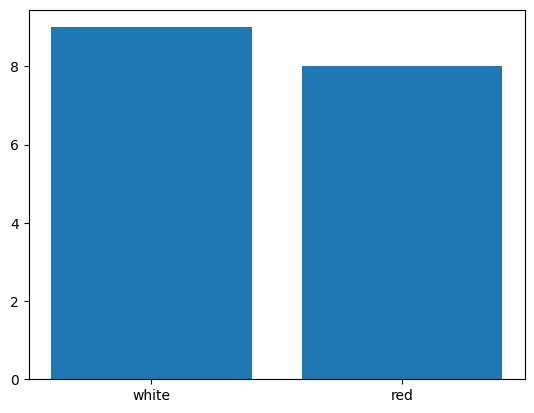

In [12]:
plt.bar(df['type'],df['quality'])

<AxesSubplot:ylabel='Frequency'>

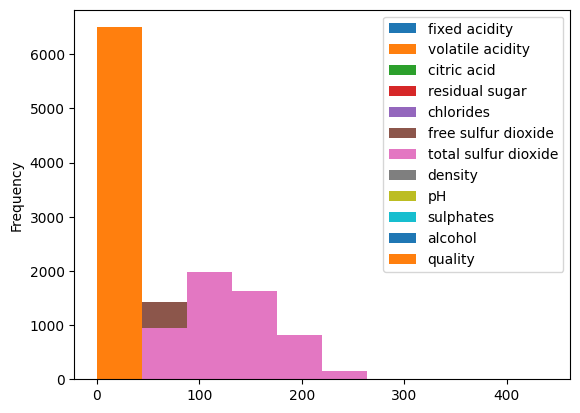

In [13]:
df.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

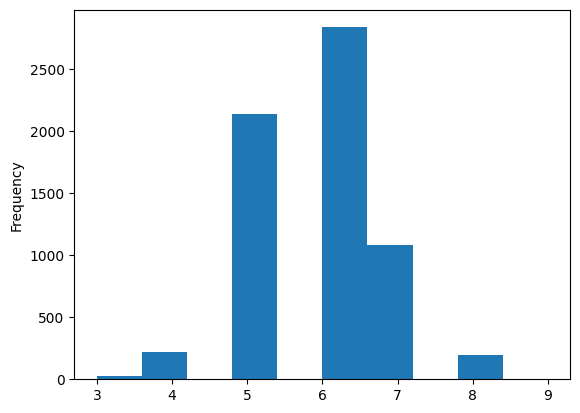

In [14]:
df['quality'].plot(kind='hist')

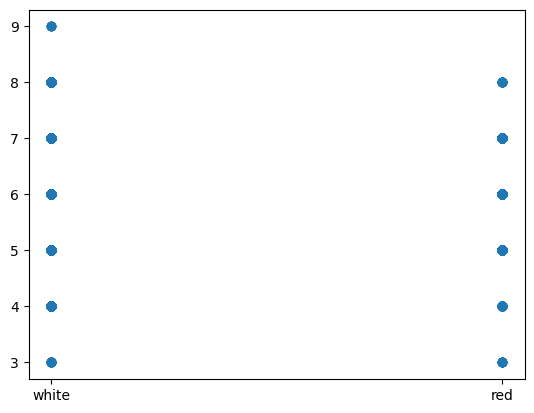

In [15]:
plt.scatter(df['type'],df['quality'])

In [16]:
df['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

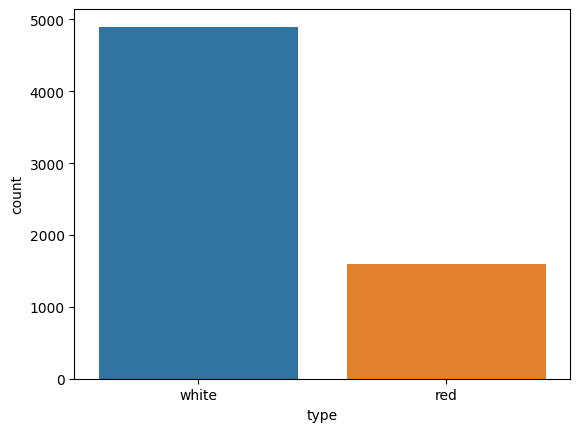

In [17]:
sns.countplot(x=df['type'])

<AxesSubplot:xlabel='type', ylabel='quality'>

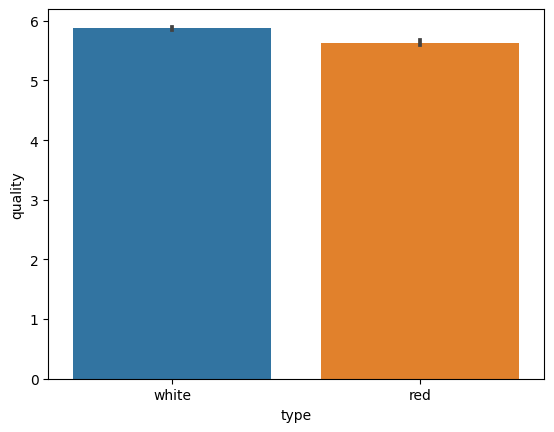

In [18]:
sns.barplot(x=df['type'],y=df['quality'])

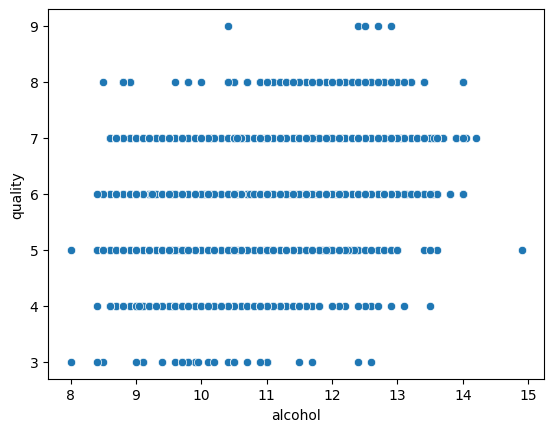

In [19]:
sns.scatterplot(x=df['alcohol'], y=df['quality'])
plt.show()

In [20]:
df['type'].unique()

array(['white', 'red'], dtype=object)

In [21]:
df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

# Preprocessing

Step 5: Preparing the data

In [22]:
dummies=['type']

In [23]:
dummy_data=pd.get_dummies(df[dummies])

In [24]:
dummy_data

,type_red,type_white
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
6492,1,0
6493,1,0
6494,1,0
6495,1,0


In [25]:
df=df.drop('type',axis=1)

In [26]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [27]:
df=pd.concat([df,dummy_data],axis=1)

In [28]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1,0


In [31]:
X = df[['fixed acidity','volatile acidity','citric acid','residual sugar',
       'chlorides','free sulfur dioxide','total sulfur dioxide','density',
       'pH','sulphates','alcohol','type_red','type_white']]
y = df['quality']

In [32]:
#Train test split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Linear Regression

Step 6: Creating and training the model

In [34]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Step 7: Making predictions

In [35]:
y_pred = lr.predict(X_test)

Step 8: Evaluating the model

In [36]:
lrs=lr.score(X_train,y_train)
mse = mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=mean_squared_error(y_test,y_pred,squared=False)
r2 = r2_score(y_test, y_pred)
print('LRS:', mse)
print('MSE:', mse)
print('MAE:', mae)
print('RMSE:', rmse)
print('R²:', r2)

LRS: 0.5448289621213211
MSE: 0.5448289621213211
MAE: 0.5720553444363735
RMSE: 0.7381253024529921
R²: 0.27328745318285264


# Ridge & Lasso Regression

1. Ridge Regression

In [37]:
ridge = Ridge(alpha=1.0)  #alpha is the regularization strength

In [38]:
ridge.fit(X_train, y_train)

Ridge()

In [39]:
ridge_pred = ridge.predict(X_test)

In [40]:
ridge_mse = mean_squared_error(y_test, ridge_pred)

In [41]:
print("Ridge Regression MSE:", ridge_mse)

Ridge Regression MSE: 0.5492282040228689


In [42]:
ridge_r2 = r2_score(y_test, ridge_pred)

In [43]:
print("Ridge Regression R2:", ridge_r2)

Ridge Regression R2: 0.26741958545076505


2. Lasso Regression

In [44]:
lasso = Lasso(alpha=1.0)  #alpha is the regularization strength

In [45]:
lasso.fit(X_train, y_train)

Lasso()

In [46]:
lasso_pred = lasso.predict(X_test)

In [59]:
lasso_mse = mean_squared_error(y_test, lasso_pred)

In [60]:
print("Lasso Regression MSE:", lasso_mse)

Lasso Regression MSE: 0.7469994337378396


In [61]:
lasso_r2 = r2_score(y_test, lasso_pred)

In [62]:
print("Lasso Regression R2:", lasso_r2)

Lasso Regression R2: 0.003625176516018125


# Random Forest

In [63]:
rf = RandomForestRegressor(n_estimators=100, random_state=0)   #sets the number of trees in the Random Forest

In [64]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [65]:
rf_pred = rf.predict(X_test)

In [66]:
rf_mse = mean_squared_error(y_test, rf_pred)

In [67]:
print("Random Forest MSE:", rf_mse)

Random Forest MSE: 0.36923205128205133


In [68]:
rf_r2 = r2_score(y_test, rf_pred)

In [69]:
print("Random Forest R2:", rf_r2)

Random Forest R2: 0.5075049547495438
